In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from nilearn.image import load_img
import pandas as pd

In [2]:
sfnr_dir = '/Users/hugofluhr/phd_local/data/LearningHabits/sfnr'

In [3]:
nii_files = [os.path.join(root, f) 
             for root, _, files in os.walk(sfnr_dir) 
             for f in files if f.endswith('.nii')]
nii_files.sort()

In [4]:
summary_stats = []
for file in nii_files:
    img = load_img(file)
    data = img.get_fdata()
    stats = {
        'file': file,
        'mean': np.mean(data),
        'std': np.std(data),
        'min': np.min(data),
        'max': np.max(data),
        'median': np.median(data)
    }
    summary_stats.append(stats)

df = pd.DataFrame(summary_stats)

In [5]:
df['sub'] = df['file'].apply(lambda x: os.path.basename(os.path.dirname(os.path.dirname(x))))
df['run'] = df['file'].apply(lambda x: os.path.basename(os.path.dirname(x)))
df.set_index(['sub', 'run'], inplace=True)

In [7]:
df_reset = df.reset_index()

<Axes: ylabel='sub,run'>

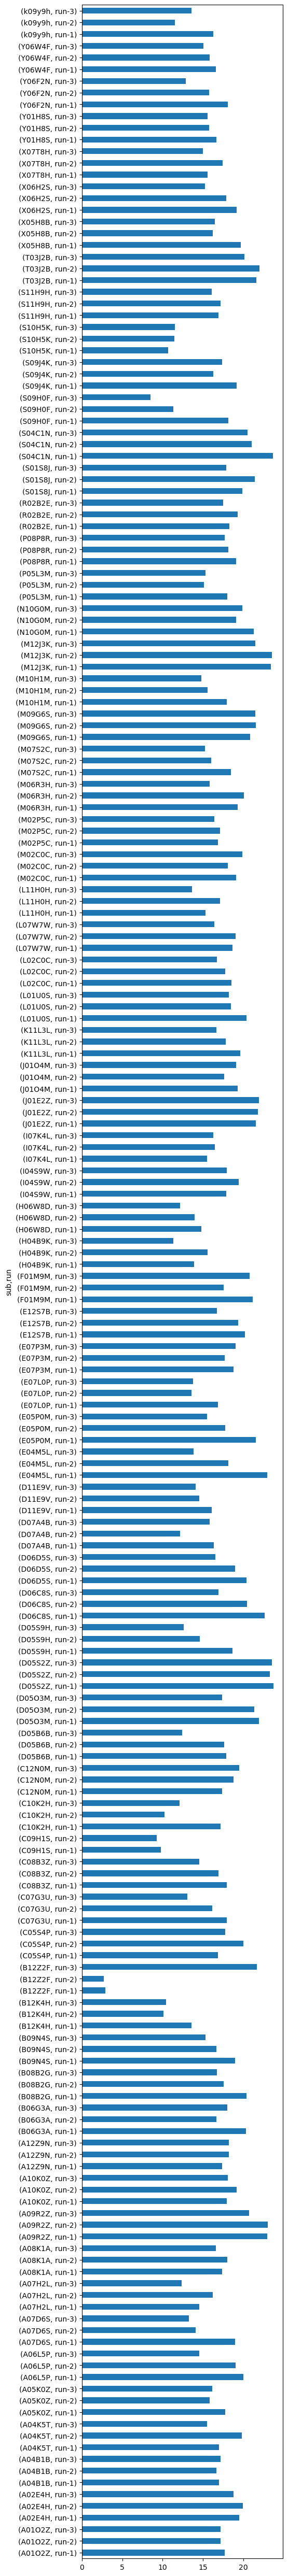

In [21]:
df.plot(kind='barh', y='mean', legend=False, figsize=(5, 64))